In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# THE BUSINESS CASE

Let's imagine, a fashion company sends out a software company send out a weekly email newsletter. Until now they send out the email newsletter during the week in the evening because they think that some individuals prefer to check their emails after the have finished work or during their leisure time. They think people are more relaxed and actually habe more time to look at the content.  

A new employee questions if evenings on weekdays are really the best time to send out those email because people might be to tired from their stressfull day.

The data analytics team sets up a test to identify the best time to send out the weekly newSletter emails.

In addition to the already mentioned timeframe **Weekdays, Evening (6:00 PM - 8:00 PM)** the team identifies 4 more timeframes that should be compared with the control timeframe: 

**Morning (8:00 AM - 10:00 AM):**
Many people check their emails first thing in the morning to start their day or when they arrive at work. Sending emails during this time may capture their attention as they review their inbox However most mornings tend to be stressfull and people might not have the time to click through the email or even purchase something. 

**Midday (11:00 AM - 1:00 PM):**
Lunch breaks are another opportune time for people to check their emails. Sending emails around midday can catch recipients during their breaks or downtime. 

**Afternoon (2:00 PM - 4:00 PM):**
Sending emails in the early to mid-afternoon can be effective as people may be looking for distractions or catching up on tasks before the end of the workday.

**Weekend:**
Weekends are also prime times for checking emails, especially during the mornings when people have more free time and are less rushed.  

#### THE METRICS

Conversion rates can vary significantly depending on factors like the brand itself, the attractiveness of products and the overall user experience of the website. These conversion rate estimates are fictional and provided to give a general idea of how the rates might vary throughout the day and over the weekend for a software company. 

For our analysis we will receive data about the following two metrics: 

- open rate: how many people actually open the email
- click-through rate: how many people click on the link provided in the email

To test the effectiveness of the emails sent out, we want to focus on the click-through rates as our primary metric, but we will test the opening rate as our secondary metric as well. 

*The rates below are made up and serve the simulation of the case.

In [60]:
metrics_values = {
    'Time': ['Morning', 'Midday', 'Afternoon',
             'Evening', 'Weekend'],
    'Open Rate (%)': [21, 20, 20, 22, 21],
    'Click-through Rate (%)': [2.5, 3, 3.5, 3.5, 4]
}

metrics = pd.DataFrame(metrics_values)
metrics

,Time,Open Rate (%),Click-through Rate (%)
0,Morning,21,2.5
1,Midday,20,3.0
2,Afternoon,20,3.5
3,Evening,22,3.5
4,Weekend,21,4.0


#### POPULATION SIMULATION

With the rates in the dataframe above we simulate 5 populations, one for each defined timeframe. 

*The data is created artificially to simulate the case.

In [55]:
np.random.seed(1)

population_size = 10000

weekday_morning = {
    'Open': np.random.choice([0, 1], size=population_size, p=[1-0.21, 0.21]),
    'Clicked': np.random.choice([0, 1], size=population_size, p=[1-0.025, 0.025])
}
pop_weekday_morning = pd.DataFrame(weekday_morning)

weekday_midday = {
    'Open': np.random.choice([0, 1], size=population_size, p=[1-0.2, 0.2]),
    'Clicked': np.random.choice([0, 1], size=population_size, p=[1-0.03, 0.03])
}
pop_weekday_midday = pd.DataFrame(weekday_midday)

weekday_afternoon = {
    'Open': np.random.choice([0, 1], size=population_size, p=[1-0.20, 0.20]),
    'Clicked': np.random.choice([0, 1], size=population_size, p=[1-0.035, 0.035])
}
pop_weekday_afternoon = pd.DataFrame(weekday_afternoon)

weekday_evening = {
    'Open': np.random.choice([0, 1], size=population_size, p=[1-0.22, 0.22]),
    'Clicked': np.random.choice([0, 1], size=population_size, p=[1-0.035, 0.035])
}
pop_weekday_evening = pd.DataFrame(weekday_evening)

weekend_morning = {
    'Open': np.random.choice([0, 1], size=population_size, p=[1-0.21, 0.21]),
    'Clicked': np.random.choice([0, 1], size=population_size, p=[1-0.04, 0.04])
}
pop_weekend_morning = pd.DataFrame(weekend_morning)

#### SAMPLING

The company opts to experiment with various times for sending out their email newsletters. They divide their subscribers into groups of **2000 (randomly assigned)** and dispatch the newsletters during different timeframes. To amass more data, they conduct the same test over 10 consecutive weeks, with fresh groups allocated each week.

#### Primary Metric: Click-Through Rate

In [62]:
sample_size = 2000
num_repetitions = 10

results = {'Morning': [], 'Midday': [], 'Afternoon': [], 'Evening': [], 'Weekend': []}

for i in range(num_repetitions):
    np.random.seed(123 + i)
    
    sample_morning = pop_weekday_morning.sample(n=sample_size)
    results['Morning'].append(sample_morning['Clicked'].sum())
    
    sample_midday = pop_weekday_midday.sample(n=sample_size)
    results['Midday'].append(sample_midday['Clicked'].sum())
    
    sample_afternoon = pop_weekday_afternoon.sample(n=sample_size)
    results['Afternoon'].append(sample_afternoon['Clicked'].sum())
    
    sample_evening = pop_weekday_evening.sample(n=sample_size)
    results['Evening'].append(sample_evening['Clicked'].sum())

    sample_weekend = pop_weekend_morning.sample(n=sample_size)
    results['Weekend'].append(sample_weekend['Clicked'].sum())

results_ct = pd.DataFrame(results)
results_ct['Week'] = [f'Week {i+1}' for i in range(num_repetitions)]
results_ct.set_index('Week', inplace=True)

print(results_ct)

         Morning  Midday  Afternoon  Evening  Weekend
Week                                                 
Week 1        47      66         67       61       89
Week 2        53      66         85       76       75
Week 3        50      48         79       85       68
Week 4        51      55         64       85       79
Week 5        39      55         72       66       88
Week 6        47      50         77       60       77
Week 7        47      62         62       89       79
Week 8        54      65         65       72       84
Week 9        46      63         61       78       80
Week 10       41      57         63       86       80


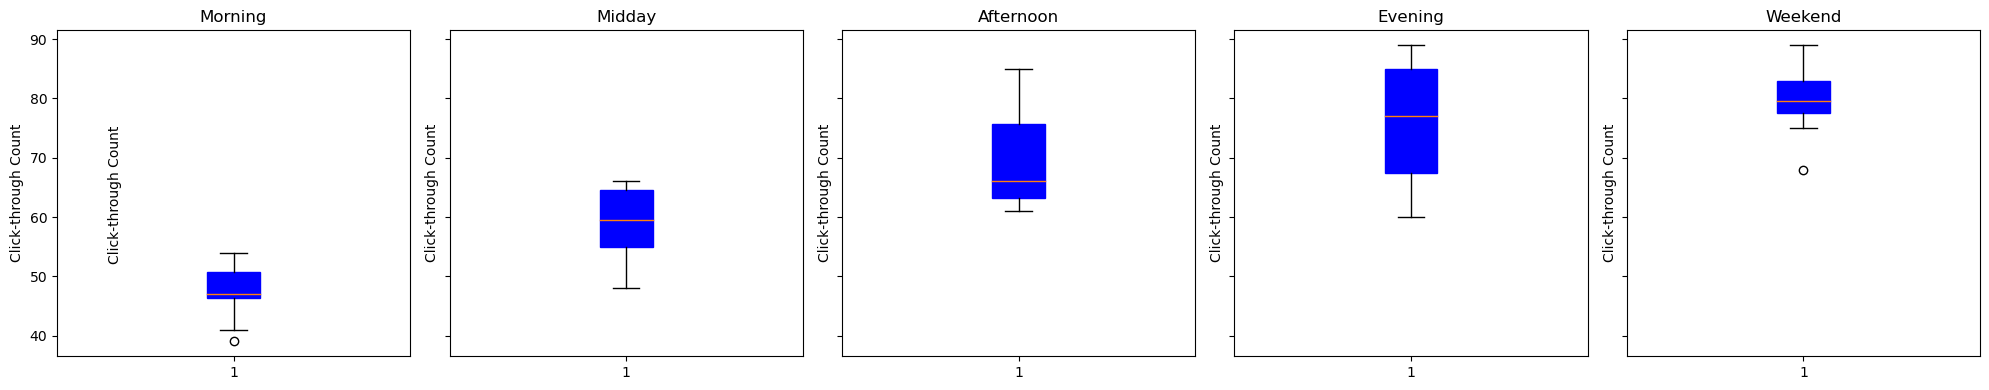

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4), sharey=True)

for i, column in enumerate(results_ct.columns):
    ax = axes[i]
    ax.boxplot(results_ct[column], patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))
    ax.set_title(column)
    ax.set_ylabel('Click-through Count')

fig.text(0.06, 0.5, 'Click-through Count', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

#### One-Way ANOVA Test for Primary Metric

Using the one-way ANOVA test I want to determine if there are statistically significant differences in the mean click-through rates among the different timeframes.

In [64]:
f_statistic, p_value = f_oneway(results_ct["Morning"], results_ct["Midday"], results_ct["Afternoon"], results_ct["Evening"], results_ct["Weekend"])

print("F statistic:", f_statistic)
print("p-value:", p_value)

F statistic: 30.171273483215284
p-value: 3.1891801151063637e-12


##### Tukey HSD Test for Primary Metric (Click-Through)

To determine which specific sending times differ significantly, we use the Tukey HSD test.

In [69]:
data_ct = pd.melt(results_ct, value_vars=["Morning", "Midday", "Afternoon", "Evening", "Weekend"])
data_ct.columns = ['sending_time', 'click_through_rate']

tukey = pairwise_tukeyhsd(endog=data_ct['click_through_rate'], groups=data_ct['sending_time'], alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1   group2 meandiff p-adj   lower    upper   reject
----------------------------------------------------------
Afternoon Evening      6.3 0.3564  -3.3546  15.9546  False
Afternoon  Midday    -10.8 0.0214 -20.4546  -1.1454   True
Afternoon Morning    -22.0    0.0 -31.6546 -12.3454   True
Afternoon Weekend     10.4  0.029   0.7454  20.0546   True
  Evening  Midday    -17.1 0.0001 -26.7546  -7.4454   True
  Evening Morning    -28.3    0.0 -37.9546 -18.6454   True
  Evening Weekend      4.1 0.7475  -5.5546  13.7546  False
   Midday Morning    -11.2 0.0156 -20.8546  -1.5454   True
   Midday Weekend     21.2    0.0  11.5454  30.8546   True
  Morning Weekend     32.4    0.0  22.7454  42.0546   True
----------------------------------------------------------


##### Interpretation Tukey HSD Test (Click-Through)

From the plot as well as the Tukey HSD Test we can conclude that neither **Morning** nor **Midday** are strong options since they have significantly lower mean click-through rates. Therefore we will focus on Afternoon, Evening and Weekend.

**Evening vs. Afternoon** The mean click-through rate for Afternoon is lower than for Evening, however the p-value states that the difference is too small to show a statistically significant difference. We fail to reject the null hypothesis.

**Evening vs. Weekend** The mean click-through rate for Weekend is higher than for Evening, however the p-value tstates that the difference is too small to show a statistically significant difference. We fail to reject the null hypothesis. 

**Afternoon vs. Weekend** The mean click-through rate for Weekend is significantly higher than for Afternoon. This indicated that Weekend has a significantly higher mean click-through rate compared to Afternoon. 

While Evening has a higher mean than Afternoon, we fail to see any statistical significance in the difference of the means. Looking at the mean for Weekend however, we can indeed see a statistical significance in comparison with Afternoon, so the company might consider sending out emails on the Weekend rather than in the Afternoon.
As seen above Weekend also has a higher mean than Evening, however it is not statistically significant, meaning that we cannot draw a clear conclusion regarding the outcome. 

The test shows that Morning, Midday and Afternoon have lower click-through means and can be excluded from further testing. However the test in inconclusive in regards to whether emails should be sent out in the Evening or during the Weekend and we may not have enough evidence to implement changes. Therefore I would recommend further tests, in this case a more detailled AB test with only these two variants.  


#### Secondary Metric: Opening Rate

In [66]:
sample_size = 2000
num_repetitions = 10

results = {'Morning': [], 'Midday': [], 'Afternoon': [], 'Evening': [], 'Weekend': []}

for i in range(num_repetitions):
    np.random.seed(123 + i)
    
    sample_morning = pop_weekday_morning.sample(n=sample_size)
    results['Morning'].append(sample_morning['Open'].sum())
    
    sample_midday = pop_weekday_midday.sample(n=sample_size)
    results['Midday'].append(sample_midday['Open'].sum())
    
    sample_afternoon = pop_weekday_afternoon.sample(n=sample_size)
    results['Afternoon'].append(sample_afternoon['Open'].sum())
    
    sample_evening = pop_weekday_evening.sample(n=sample_size)
    results['Evening'].append(sample_evening['Open'].sum())

    sample_weekend = pop_weekend_morning.sample(n=sample_size)
    results['Weekend'].append(sample_weekend['Open'].sum())

results_o = pd.DataFrame(results)
results_o['Week'] = [f'Week {i+1}' for i in range(num_repetitions)]
results_o.set_index('Week', inplace=True)

print(results_o)

         Morning  Midday  Afternoon  Evening  Weekend
Week                                                 
Week 1       397     398        404      470      373
Week 2       397     402        427      465      435
Week 3       413     409        411      445      390
Week 4       416     410        415      451      396
Week 5       399     395        396      428      419
Week 6       435     395        383      482      397
Week 7       414     409        393      460      413
Week 8       432     405        397      479      419
Week 9       403     406        378      435      441
Week 10      437     364        396      433      401


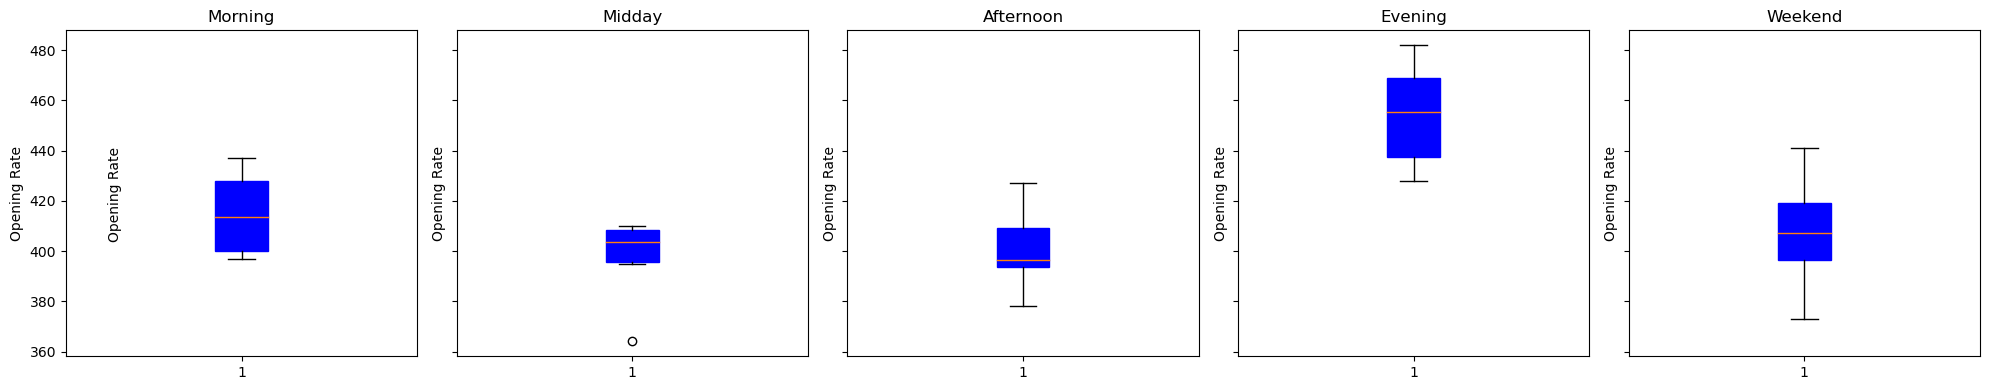

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4), sharey=True)

for i, column in enumerate(results_o.columns):
    ax = axes[i]
    ax.boxplot(results_o[column], patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))
    ax.set_title(column)
    ax.set_ylabel('Opening Rate')

fig.text(0.06, 0.5, 'Opening Rate', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

##### One-Way ANOVA Test for Secondary Metric (Opening Rate)
Using the one-way ANOVA test I want to determine if there are statistically significant differences in the mean click-through rates among the different timeframes.

In [67]:
f_statistic, p_value = f_oneway(results_o["Morning"], results_o["Midday"], results_o["Afternoon"], results_o["Evening"], results_o["Weekend"])

print("F statistic:", f_statistic)
print("p-value:", p_value)

F statistic: 17.91821720720583
p-value: 7.267129796831208e-09


##### Tukey HSD Test for Primary Metric (Opening Rate)
To determine which specific sending times differ significantly, we use the Tukey HSD test.

In [70]:
data_o = pd.melt(results_o, value_vars=["Morning", "Midday", "Afternoon", "Evening", "Weekend"])
data_o.columns = ['sending_time', 'click_through_rate']

tukey = pairwise_tukeyhsd(endog=data_o['click_through_rate'], groups=data_o['sending_time'], alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1   group2 meandiff p-adj   lower    upper   reject
----------------------------------------------------------
Afternoon Evening     54.8    0.0  33.0541  76.5459   True
Afternoon  Midday     -0.7    1.0 -22.4459  21.0459  False
Afternoon Morning     14.3 0.3487  -7.4459  36.0459  False
Afternoon Weekend      8.4 0.8068 -13.3459  30.1459  False
  Evening  Midday    -55.5    0.0 -77.2459 -33.7541   True
  Evening Morning    -40.5    0.0 -62.2459 -18.7541   True
  Evening Weekend    -46.4    0.0 -68.1459 -24.6541   True
   Midday Morning     15.0 0.3019  -6.7459  36.7459  False
   Midday Weekend      9.1 0.7575 -12.6459  30.8459  False
  Morning Weekend     -5.9 0.9376 -27.6459  15.8459  False
----------------------------------------------------------


##### Interpretation Tukey HSD Test (Opening Rate)

From the plots we can already see that **Evening** has a much higher mean opening rate than all other timeframes. 

Looking at the results from the Tukey HSD Test we can also see that the difference between the mean for **Evening** compared to all other timeframes is statistically significantly higher, while we fail to reject the null hypothesis comparing all other timeframes with each other. 

Based on the results of the secondary metric, the company should keep sending out the email newsletters in the **Evening during the week**.
